#### Data Exploration: Summerize Data

In [14]:
%run "./initialization.ipynb"

In [6]:
def remap_org(df):
  # Given a dataframe, add a learner field with randome names
  
  url = 'https://gist.githubusercontent.com/Miserlou/11500b2345d3fe850c92/raw/e36859a9eef58c231865429ade1c142a2b75f16e/gistfile1.txt'
  skip = [0,1,2,4]
  # Read in a random name list
  cityDf = pd.read_csv(url, skiprows=skip, skipfooter=26, engine='python')
  # Get the largest cities
  nameList = cityDf[ cityDf['population'] > 900000].city.tolist()
  nameList = [' '.join( [ name, 'Schools' ] ) for name in nameList]
  # Randomize the list
  random.shuffle(nameList)

  # Replace learner id with a random name
  return id_to_name(df, 'org_id', 'org_new', nameList)
  
dfRaw = remap_org(dfRaw)


In [7]:
def remap_learner(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  nameList = pd.read_csv('https://raw.githubusercontent.com/huntergregal/wordlists/master/names.txt', header=None, names=['list']).list.tolist()
  
  # Randomize the list
  random.shuffle(nameList)
  
  # Replace learner id with a random name
  return id_to_name(df, 'learner_id', 'learner_new', nameList)
  
  

dfRaw = remap_learner(dfRaw)

In [8]:
def remap_section(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  nameList = pd.read_csv('https://raw.githubusercontent.com/kjhealy/hourly/master/data/famous-people.csv').Name.tolist()
  suffix = ['High', 'Elementry', 'Secondary', 'Prep']
  
  nameList = [' '.join( [ name, suffix[random.randint(0, 3)] ] ) for name in nameList]
  # Randomize the list
  random.shuffle(nameList)

  # Replace learner id with a random name
  return id_to_name(df, 'section_id', 'section_new', nameList)
  
dfRaw = remap_section(dfRaw)

In [9]:
def remap_assessment(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  fields = ['one', 'two', 'topics', 'question','five','six','seven','eight', 'nine']
  url = 'https://gist.githubusercontent.com/blackwatertepes/5172428/raw/8bf38936cb47f03ed3e0ffb76ea5027d4ff0368a/jeopardy.txt'
  nameList = pd.read_csv(url, header=None, sep='\t', low_memory=False,error_bad_lines=False, names=fields, nrows=2000).topics.tolist()
  
  # Filter out names less than 2 words
  nameList = filter(lambda x: len(x.split()) > 2, nameList) 
  # Title case
  nameList = [name.title() for name in nameList]
  # Randomize the list
  random.shuffle(nameList)
  
  # Replace learner id with a random name
  return id_to_name(df, 'assessment_id', 'assessment_new', nameList)
  

dfRaw = remap_assessment(dfRaw)

In [30]:
dfRaw.select().count()

149807

In [31]:
pd.set_option('display.max_colwidth', None)
dfPanda = dfDesc.toPandas()
dfPanda

,field,category,type,description
0,assessment_id,Assessment,Categorical Identifier,ID of an Assessment.
1,assessment_instance_attempt_id,Assignment Attempt,Categorical Identifier,ID of a learner's attempt of an assessment.
2,assessment_instance_id,Assessment,Categorical Identifier,ID of a section's instance of an assessment.
3,assessment_item_response_id,Item Attempt,Categorical Identifier,ID of a learners response to an assessment item.
4,assigned_item_status,Item Attempt,Categorical Nominal,"Code indicating the status of the assessment item. Values: scored, offline_scored: manually scored, assigned: not yet started, responded: being scored"
5,assignment_attempt_number,Assignment Attempt,Numeric Continuous,The nth time a certain learner attempted the assessement.
6,assignment_due_date,Assignment,Categorical Interval,The date and time the assignment is due.
7,assignment_final_submission_date,Assignment,Categorical Interval,The date and time the assignment was submitted for scoring.
8,assignment_late_submission,Assignment,Categorical Binary,True if the assignment was submitted late.
9,assignment_max_attempts,Assignment,Numeric Continuous,The number of times a learner can attempt the assessment.


In [32]:
dfDesc.select('category').distinct().show(20,False)

+------------------+
|category          |
+------------------+
|Section           |
|Assignment Attempt|
|Item              |
|Assessment        |
|Learner           |
|Organization      |
|Item Attempt      |
|Assignment        |
+------------------+



In [33]:
orgVars               = dfPanda.loc[ dfPanda['category'] == 'Organization' ].field.tolist()
sectionVars           = dfPanda.loc[ dfPanda['category'] == 'Section' ].field.tolist()
learnerVars           = dfPanda.loc[ dfPanda['category'] == 'Learner' ].field.tolist()
assessmentVars        = dfPanda.loc[ dfPanda['category'] == 'Assessment' ].field.tolist()
assignmentVars        = dfPanda.loc[ dfPanda['category'] == 'Assignment' ].field.tolist()
itemVars              = dfPanda.loc[ dfPanda['category'] == 'Item' ].field.tolist()
assignmentAttemptVars = dfPanda.loc[ dfPanda['category'] == 'Assignment Attempt' ].field.tolist()
itemAttemptVars       = dfPanda.loc[ dfPanda['category'] == 'Item Attempt' ].field.tolist()

###### Display Sample Data

In [38]:
dfRaw.select(*orgVars, 'org_new').distinct().toPandas()

,org_id,org_new
0,360541,San Diego Schools
1,349115,San Antonio Schools
2,360421,Dallas Schools


- 3 organizations

In [39]:
dfRaw.filter( F.col('org_id') == 360421).select(*sectionVars, 'section_new').distinct().toPandas()

,section_id,section_new
0,520208,Roman Abramovich High
1,498977,Ronald Reagan Prep
2,522071,Christopher Columbus Secondary
3,537231,Mao Zedong Elementry
4,498945,Anne Frank Prep
5,498965,Jimmy Wales Secondary
6,509045,John F. Kennedy Secondary
7,499047,Oscar Wilde High
8,499081,Paul Krugman Prep
9,499023,Coco Chanel Secondary


- 18 sections in organization 360421

In [40]:
dfRaw.filter( F.col('section_id') == 498941).select(*learnerVars, 'learner_new').distinct().toPandas()

,learner_id,learner_new
0,1248228,Heather
1,1251590,Bryna
2,1332744,Salomi
3,1365609,Lorletha
4,1252768,Ertan
5,1249790,Adrie
6,1249881,Carlye
7,1344830,Nguyen
8,1355895,Ginni
9,1248093,Dianemarie


- 24 learners in section 498941

In [41]:
dfRaw.filter( F.col('section_id') == 498941).select(*assessmentVars, 'assessment_new').distinct().toPandas()

,assessment_id,assessment_instance_id,assessment_new
0,721038,846625,What Could She Be Doing In There?
1,720511,813988,Who'S Who In Sports
2,721235,876562,Band In Boston
3,720657,799125,Young Women Of Today
4,720761,879857,"Give Me A ""C"""
5,720591,878024,Life Of The Party


- 6 assessments in section 498941

###### Display Assignments for Section 498941

In [42]:
dfRaw.filter( F.col('section_id') == 498941).select('assessment_new', *assignmentVars).distinct().orderBy('assignment_due_date').toPandas()

,assessment_new,assignment_due_date,assignment_final_submission_date,assignment_late_submission,assignment_max_attempts,assignment_start_date,ced_assignment_type_code,is_affecting_grade,max_student_stop_datetime,min_student_start_datetime,number_of_distinct_instance_items,number_of_learners
0,What Could She Be Doing In There?,2019-10-30 04:59:00,2019-10-30 04:59:00,False,1,2019-10-28 05:00:00,clo,True,2019-11-16 04:09:25.260000,2019-10-28 19:49:28.028000,2,27
1,Young Women Of Today,2019-11-06 05:59:00,2019-11-06 05:59:00,False,1,2019-10-31 05:00:00,assessment,True,2019-11-05 23:21:59.287000,2019-10-31 19:19:21.510000,18,27
2,Life Of The Party,2020-01-18 05:59:00,2020-01-18 05:59:00,False,1,2020-01-16 06:00:00,assessment,True,2020-01-17 20:11:14.079000,2020-01-16 20:18:26.011000,19,23
3,Who'S Who In Sports,2020-02-15 05:59:00,2020-02-15 05:59:00,False,1,2020-02-13 06:00:00,assessment,True,2999-01-01 00:00:00,1900-01-01 00:00:00,9,23
4,Band In Boston,2020-02-29 05:59:00,2020-02-29 05:59:00,False,1,2020-02-27 06:00:00,assessment,True,2020-02-29 06:00:06.925000,2020-02-27 21:04:03.241000,10,22
5,"Give Me A ""C""",2020-04-12 04:59:00,2020-04-12 04:59:00,False,1,2020-04-09 05:00:00,assessment,True,2020-04-12 04:59:13.840000,2020-04-09 17:00:20.741000,12,23


- 6 assignments (one for each assessment) in section 498941

###### Display Assignment Items for Assessment 720657 of Section 498941

In [43]:
dfRaw.filter( F.col('assessment_id') == 720657).select(*itemVars).distinct().toPandas()

,item_is_offline_scored,item_type_code_name,scoring_type_code
0,False,None,[unassigned]
1,True,trueFalse,automatic
2,False,multipleChoice,automatic
3,False,matching,automatic
4,False,essay,[unassigned]
5,False,shortAnswer,[unassigned]
6,False,trueFalse,automatic


- 7 items in assessment 720657
- 1 item (true/false) is offline scored
- 4 items automatice scoring code and 3 unassigned

###### Display Assignment Attempt for Attempt 1115526

In [44]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1115526 ).select(*assignmentAttemptVars).distinct().toPandas()

,assessment_instance_attempt_id,assignment_attempt_number,final_score_unweighted,is_force_scored,is_manual_scoring_required,learner_assignment_attempt_id,learner_attempt_status,points_possible_unweighted,scored_datetime,student_start_datetime,student_stop_datetime,was_fully_scored_datetime,was_in_progress_datetime,was_submitted_datetime_actual
0,1115526,1,0,False,False,1050015,in progress,39.0,2999-01-01 00:00:00+00,2019-11-03 22:41:04.219000,2999-01-01 00:00:00,2999-01-01 00:00:00,2019-11-03 22:41:04.219000,2999-01-01 00:00:00


- Attempt is in progress (not finished)
- Empty (default) scored_datetime, student_stop_datetime, was_fully_scored_datetime, was_submitted_datetime_actual
- Final score is 0
- Same values in student_start_datetime and was_in_progress_datetime

###### Display Assignment Attempt for Attempt 1159455

In [45]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1159455 ).select(*assignmentAttemptVars).distinct().toPandas()

,assessment_instance_attempt_id,assignment_attempt_number,final_score_unweighted,is_force_scored,is_manual_scoring_required,learner_assignment_attempt_id,learner_attempt_status,points_possible_unweighted,scored_datetime,student_start_datetime,student_stop_datetime,was_fully_scored_datetime,was_in_progress_datetime,was_submitted_datetime_actual
0,1159455,1,9,False,False,965818,fully scored,12.0,2020-04-11 03:59:35+00,2020-04-09 18:30:43.079000,2020-04-11 03:59:35.992000,2020-04-11 03:59:35,2020-04-09 18:30:43.079000,2020-04-11 03:59:35.992000


- Attempt is finished (fully scored)

###### Display Assignment Attempt Items for Attempt 1115526

In [46]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1115526 ).select(*itemAttemptVars).distinct().toPandas()

,assessment_item_response_id,assigned_item_status,is_deleted,learner_assigned_item_attempt_id,response_correctness
0,1572894.0,scored,False,1531985,correct
1,1592595.0,scored,False,1532003,correct
2,1626110.0,scored,False,1532004,correct
3,1571371.0,scored,False,1531981,incorrect
4,1561797.0,scored,False,1531983,incorrect
5,1616296.0,scored,False,1531998,incorrect
6,1571743.0,scored,False,1532001,correct
7,1556172.0,scored,False,1532002,correct
8,1652901.0,scored,False,1532000,incorrect
9,1631451.0,scored,False,1531984,incorrect


- 16 observations
- 15 answered (scored)
  - 7 correct
  - 7 incorrect
  - 1 partically correct
- 1 not answered (delivered)
  - assessment not completed

###### Display Assignment Attempt Items for Attempt 1159455

In [47]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1159455 ).select(*itemAttemptVars).distinct().toPandas()

,assessment_item_response_id,assigned_item_status,is_deleted,learner_assigned_item_attempt_id,response_correctness
0,1596516,scored,False,1413322,correct
1,1581835,scored,False,1413319,correct
2,1549179,scored,False,1413324,correct
3,1547897,scored,False,1413317,incorrect
4,1635317,scored,False,1413318,correct
5,1585073,scored,False,1413325,correct
6,1622897,scored,False,1413321,incorrect
7,1616794,scored,False,1413316,correct
8,1586273,scored,False,1413320,correct
9,1554205,scored,False,1413323,correct


##### Display Variables

###### Display Categorical Identifier Variables

In [48]:
# Save field names
identifierVarObs = dfDesc.filter("type = 'Categorical Identifier'")
identifierVars = [row['field'] for row in identifierVarObs.select('field').collect()]
identifierVarObs.select(F.col('field').alias('Categorical Identifier')).show(20,False)

+--------------------------------+
|Categorical Identifier          |
+--------------------------------+
|assessment_id                   |
|assessment_instance_attempt_id  |
|assessment_instance_id          |
|assessment_item_response_id     |
|learner_assigned_item_attempt_id|
|learner_assignment_attempt_id   |
|learner_id                      |
|org_id                          |
|section_id                      |
+--------------------------------+



###### Display Categorical Nominal Variables

In [49]:
nominalVarObs    = dfDesc.filter("type = 'Categorical Nominal'")
nominalVars = [row['field'] for row in nominalVarObs.select('field').collect()]
nominalVarObs.select(F.col('field').alias('Categorical Nominal')).show(20,False)

+------------------------+
|Categorical Nominal     |
+------------------------+
|assigned_item_status    |
|ced_assignment_type_code|
|item_type_code_name     |
|learner_attempt_status  |
|response_correctness    |
|scoring_type_code       |
+------------------------+



###### Display Numeric Continuous Variables

In [50]:
continousVarObs  = dfDesc.filter("type = 'Numeric Continuous'")
continousVars = [row['field'] for row in continousVarObs.select('field').collect()]
continousVarObs.select(F.col('field').alias('Numeric Continuous')).show(20,False)

+---------------------------------+
|Numeric Continuous               |
+---------------------------------+
|assignment_attempt_number        |
|assignment_max_attempts          |
|final_score_unweighted           |
|number_of_distinct_instance_items|
|number_of_learners               |
|points_possible_unweighted       |
+---------------------------------+



###### Display Categorical Interval Varibles

In [51]:
intervalVarObs   = dfDesc.filter("type = 'Categorical Interval'")
intervalVars = [row['field'] for row in intervalVarObs.select('field').collect()]
intervalVarObs.select(F.col('field').alias('Categorical Interval')).show(20,False)

+--------------------------------+
|Categorical Interval            |
+--------------------------------+
|assignment_due_date             |
|assignment_final_submission_date|
|assignment_start_date           |
|max_student_stop_datetime       |
|min_student_start_datetime      |
|scored_datetime                 |
|student_start_datetime          |
|student_stop_datetime           |
|was_fully_scored_datetime       |
|was_in_progress_datetime        |
|was_submitted_datetime_actual   |
+--------------------------------+



In [52]:
binaryVarObs     = dfDesc.filter("type = 'Categorical Binary'")
binaryVars = [row['field'] for row in binaryVarObs.select('field').collect()]
binaryVarObs.select(F.col('field').alias('Categorical Binary')).show(20,False)

+--------------------------+
|Categorical Binary        |
+--------------------------+
|assignment_late_submission|
|is_affecting_grade        |
|is_deleted                |
|is_force_scored           |
|is_manual_scoring_required|
|item_is_offline_scored    |
+--------------------------+



In [53]:
# Set empty dates to null
for f in intervalVars:
  dfRaw = dfRaw.withColumn(f, F.col(f).cast(T.TimestampType() ) )


In [54]:
# Schema
dfRaw.printSchema()

root
 |-- ced_assignment_type_code: string (nullable = true)
 |-- is_affecting_grade: boolean (nullable = true)
 |-- number_of_learners: integer (nullable = true)
 |-- number_of_distinct_instance_items: integer (nullable = true)
 |-- assignment_max_attempts: integer (nullable = true)
 |-- assignment_late_submission: boolean (nullable = true)
 |-- assignment_final_submission_date: timestamp (nullable = true)
 |-- assignment_start_date: timestamp (nullable = true)
 |-- assignment_due_date: timestamp (nullable = true)
 |-- min_student_start_datetime: timestamp (nullable = true)
 |-- max_student_stop_datetime: timestamp (nullable = true)
 |-- assignment_attempt_number: integer (nullable = true)
 |-- was_fully_scored_datetime: timestamp (nullable = true)
 |-- was_submitted_datetime_actual: timestamp (nullable = true)
 |-- was_in_progress_datetime: timestamp (nullable = true)
 |-- is_force_scored: boolean (nullable = true)
 |-- is_manual_scoring_required: boolean (nullable = true)
 |-- stude

In [55]:
dfRaw = dfRaw.filter(F.col('learner_attempt_status') == 'fully scored')

In [57]:
for f in identifierVars:
  print(f)
  dfRaw.agg(
    F.countDistinct(f).alias('unique'), 
    F.count(F.when(F.col(f).isNull(), f)).alias('null')
  ).show()

assessment_id
+------+----+
|unique|null|
+------+----+
|   329|   0|
+------+----+

assessment_instance_attempt_id
+------+----+
|unique|null|
+------+----+
|  8483|3264|
+------+----+

assessment_instance_id
+------+----+
|unique|null|
+------+----+
|   615|   0|
+------+----+

assessment_item_response_id
+------+-----+
|unique| null|
+------+-----+
| 64368|15710|
+------+-----+

learner_assigned_item_attempt_id
+------+----+
|unique|null|
+------+----+
| 79689|   0|
+------+----+

learner_assignment_attempt_id
+------+----+
|unique|null|
+------+----+
|  8855|   0|
+------+----+

learner_id
+------+----+
|unique|null|
+------+----+
|  1126|   0|
+------+----+

org_id
+------+----+
|unique|null|
+------+----+
|     3|   0|
+------+----+

section_id
+------+----+
|unique|null|
+------+----+
|    46|   0|
+------+----+



Totals
- org_id: 3
  - ID per organization
- section_id: 46
  - ID per section/school
- learner_id: 1126
  - ID per learner/student
- assessment_id: 329
  - ID per each assessment/quiz.  
- assessment_instance_id: 615
  - ID of each time a section uses the assessment
- assessment_instance_attempt_id: 8483 null: 3264
  - ID of each time an assessment is attempted by a student
- assessment_item_response_id: 64368 null: 15710
  - ID of each response/answer to an assessment question
- learner_assignment_attempt_id: 8855
  - ID of each learner attempt of an assigned assessment
- learner_assigned_item_attempt_id: 79689
  - ID of each learner attempt of a item/question on an assigned assessment

###### Variable Descriptive Statistics

In [58]:
# Categorical / Nominal Values
for f in nominalVars:
  dfRaw.groupBy(f).count().orderBy('count', ascending=False).show(50, False)
  

+--------------------+-----+
|assigned_item_status|count|
+--------------------+-----+
|scored              |64804|
|offline_scored      |12446|
|assigned            |3264 |
|responded           |34   |
+--------------------+-----+

+------------------------+-----+
|ced_assignment_type_code|count|
+------------------------+-----+
|assessment              |76172|
|practice                |2562 |
|game                    |1555 |
|clo                     |248  |
|rubric                  |11   |
+------------------------+-----+

+----------------------+-----+
|item_type_code_name   |count|
+----------------------+-----+
|multipleChoice        |32451|
|fillInTheBlank        |12072|
|equationEntry         |9516 |
|trueFalse             |4963 |
|cloze                 |3576 |
|null                  |3264 |
|multipleSelect        |2691 |
|graphing              |2415 |
|MultipleChoiceResponse|1550 |
|choiceMatrix          |1336 |
|matching              |1164 |
|bucketing             |1051 |
|sel

##### Null Values
- response_correctness
  - 3298 null values
    - investigate further
  - 1566 "[unassigned]"
    - investigate further for relation to the 1566 assignment_attempt_number and assignment_max_attempts values
  - Could be null because the question wasn't answered or a different method of scoring the question
- item_type_code_name
  - Investigate further
  - Could be related to unstarted or unanswered questions

##### Large number of categorical values
- item_type_code_name
  - Need to transform by reclassifying to reduce number of levels
  
##### learner_attempt_status
- Unary "fully scored"

In [59]:
# Create Todo list
add_todo('Investigate 3298 null values in response_correctness')
add_todo('Investigate 1566 [unassigned] in response_correctness')
add_todo('Investigate null values in item_type_code_name')
add_todo('Reduce number of levels in item_type_code_name')
add_todo('Remove unary learner_attempt_status = "fully scored"')

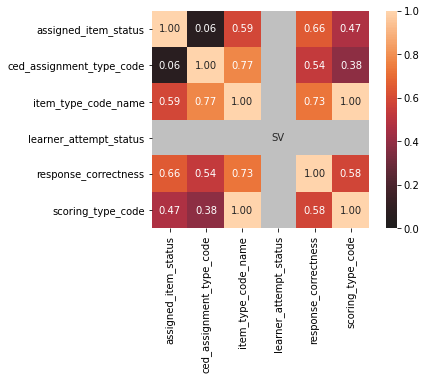

In [61]:
corr, ax = associations( dfRaw.select(*nominalVars).toPandas(), nan_replace_value='null' )

- High correlation between item_type_code_name and scoring_type_code
- learner_attempt_status a single value ('fully scored)

In [63]:
def item_to_code():
  dfPd = dfRaw.select('item_type_code_name','scoring_type_code').toPandas()
  return pd.crosstab(dfPd.item_type_code_name.fillna('null'), dfPd.scoring_type_code.fillna('null'), margins=True, margins_name="Total")
  
item_to_code()

scoring_type_code,[unassigned],automatic,external,manual,Total
item_type_code_name,,,,,
FillinBlankResponse,5,0,0,0,5
MultipleChoiceResponse,1550,0,0,0,1550
RubricResponse,11,0,0,0,11
aheAlgo,0,0,219,0,219
bucketing,0,1051,0,0,1051
choiceMatrix,0,1336,0,0,1336
cloze,0,3576,0,0,3576
equationEntry,0,9516,0,0,9516
essay,9,0,0,991,1000


- item_type_code_name indicates the scoring_type_code
  - scoring_type_code = '[unnassigned]' for item_type_code_name is..
    - shortAnswer, null, essay (9 times), RubricResponse, MultipleChoiceResponse, FillInBlankResponse
  - scoring_type_code = external only for item_type_code_name = aheAlgo
  - scoring_type_code = 'manual' for item_type_code_name is..
    - essay, fileUpload, shortAnswer

In [64]:
def num_cont_vars():
  # Numerical / Continuous Variables
  desc = dfRaw.describe()
  for f in continousVars:
    desc.select("summary", f).show(5,False)

num_cont_vars()

+-------+-------------------------+
|summary|assignment_attempt_number|
+-------+-------------------------+
|count  |80548                    |
|mean   |0.9805581764910364       |
|stddev |0.13807271883793756      |
|min    |0                        |
|max    |1                        |
+-------+-------------------------+

+-------+-----------------------+
|summary|assignment_max_attempts|
+-------+-----------------------+
|count  |80548                  |
|mean   |0.9805581764910364     |
|stddev |0.13807271883793756    |
|min    |0                      |
|max    |1                      |
+-------+-----------------------+

+-------+----------------------+
|summary|final_score_unweighted|
+-------+----------------------+
|count  |80548                 |
|mean   |13.131449570442468    |
|stddev |14.834671089990382    |
|min    |0                     |
|max    |60                    |
+-------+----------------------+

+-------+---------------------------------+
|summary|number_of_distinc

assignment_attempt_number
assignment_max_attempts
final_score_unweighted
number_of_distinct_instance_items
number_of_learners
points_possible_unweighted


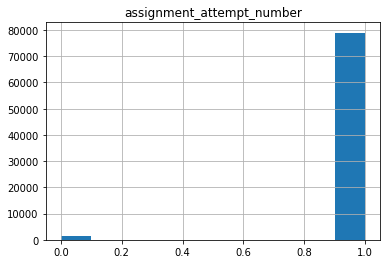

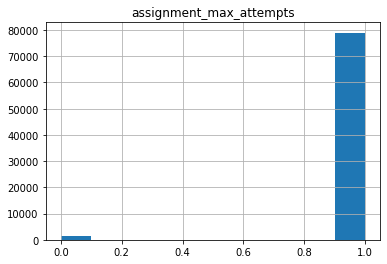

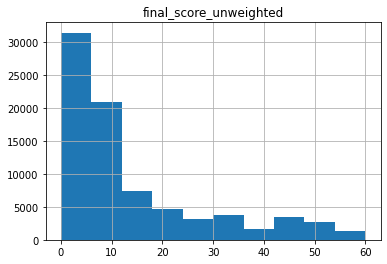

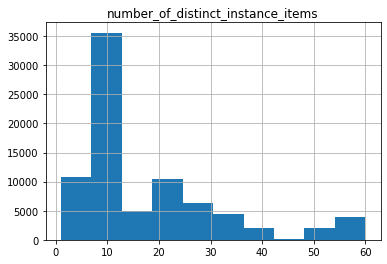

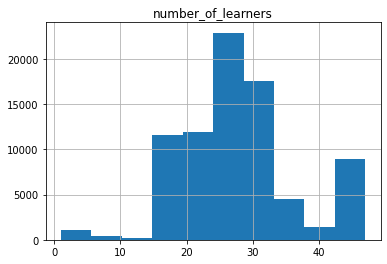

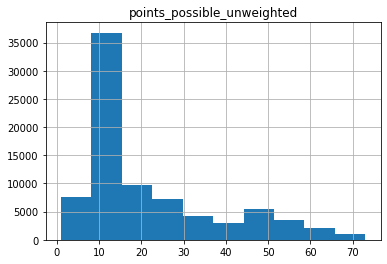

In [65]:
for f in continousVars:
  print(f)
  dfRaw.select(f).toPandas().hist()

Normal Distribution
- number_of_learners
- possible outliers greaterthan 40
- investigate further

Right Skewed
- final_score_unweighted
- number_of_distinct_instance_items
- points_possible_unweighted

Binary Values (0/1)
- assignment_max_attempts
- assignment_attempt_number
- Appears binary but the variable name indicates it could have any values. The data only contains 1 and 0
- Investigate further

In [66]:
add_todo("Investigate number_of_learners > 40 outliers")
add_todo("Investigate binary variables assignment_attempt_number and assignment_max_attempts")

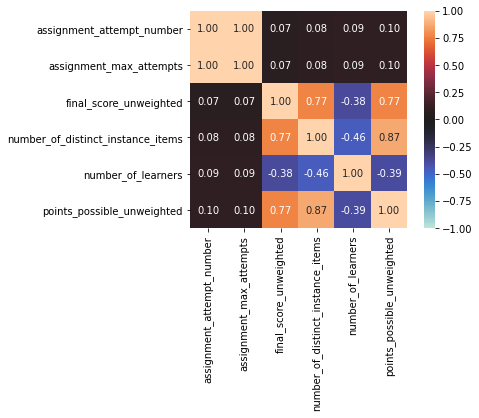

In [68]:
corr, ax = associations( dfRaw.select(*continousVars).toPandas(), nan_replace_value='null' )

- assignment_attempt_number and assignment_max_attempts highly correlated

In [70]:
def attempt_to_max():
  dfPd = dfRaw.select('assignment_attempt_number', 'assignment_max_attempts').toPandas()
  return pd.crosstab(dfPd.assignment_attempt_number.fillna('null'), dfPd.assignment_max_attempts.fillna('null'), margins=True, margins_name="Total")
  
attempt_to_max()

assignment_max_attempts,0,1,Total
assignment_attempt_number,,,
0,1566,0,1566
1,0,78982,78982
Total,1566,78982,80548


- assignment_max_attempts 1 is always assignment_attempt_number = 1

In [71]:
for c in continousVars:
  print(c)
  dfRaw.agg(
    F.count(F.when(F.col(c).isNull(), c)).alias('null'),
    F.count(F.when(F.col(c) == 0, c)).alias("zero")
  ).show()

assignment_attempt_number
+----+----+
|null|zero|
+----+----+
|   0|1566|
+----+----+

assignment_max_attempts
+----+----+
|null|zero|
+----+----+
|   0|1566|
+----+----+

final_score_unweighted
+----+-----+
|null| zero|
+----+-----+
|   0|16582|
+----+-----+

number_of_distinct_instance_items
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+

number_of_learners
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+

points_possible_unweighted
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+



- possibile correlation between assignment_attempt_number and assignment_max_attempts
  - both have 1566 zero values
  - Needs further investigation
- final_score_unweighted has 16,582 zero values
  - possibly because not yet scored
  - needs further investigation

In [72]:
add_todo('Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values')
add_todo('Investigate final_score_unweighted has 16,582 zero values')

In [73]:
for f in intervalVars:
  print (f)
  dfRaw.agg(
    F.countDistinct(f).alias('unique'), 
    F.count(F.when(F.col(f).isNull(), f)).alias('null'),
    F.min(f).alias('min'),
    F.max(f).alias('max')
 ).show(1, False)

assignment_due_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|191   |0   |2019-08-23 04:59:00|2999-01-01 00:00:00|
+------+----+-------------------+-------------------+

assignment_final_submission_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|200   |0   |2019-08-23 04:59:00|2999-01-01 00:00:00|
+------+----+-------------------+-------------------+

assignment_start_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|207   |0   |1900-01-01 00:00:00|2020-05-19 05:00:00|
+------+----+-------------------+-------------------+

max_student_stop_datetime
+------+----+-----------------------+-----------------------+
|unique|null|min        

Default Date Values
- All variables have some dates have default values '2999-01-01 00:00:00' as max and '1900-01-01 00:00:00' as min
- Almost all interval variables
  - except max_student_stop_datetime and max_student_stop_datetime
- These are substitutes for no value and will need to be replaced nulls
- Further investigation is needed as what the nulls mean

In [74]:
add_todo('Replace default dates with nulls')
add_todo('Investigate why some dates are null')

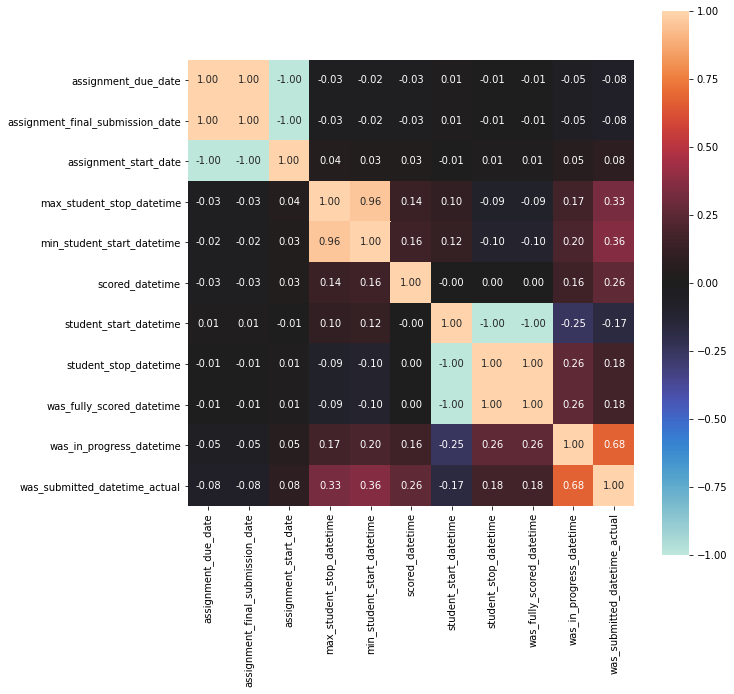

In [75]:
corr, ax = associations( dfRaw.select(* (F.unix_timestamp(c).alias(c) for c in intervalVars) ).toPandas(), figsize=[10,10] )

- Correlated dates
  - assignment_due_date and assignment_final_submission_date
  - assigment_due_date and assignment_start_date 
  - min_student_start_datetime and max_student_start_datetime
  - student_start_datetime and student_stop_datetime
  - student_start_datetime and was_fully_scored_datetime
  - student_stop_datetime and was_fully_scored_datetime
- Correlation appears to be because the events closely follow each other

In [76]:
# Categorical / Interval Variables
defaults = ["2999-01-01 00:00:00","1900-01-01 00:00:00"]

for f in intervalVars:
  print (f)
  dfRaw.agg(
    F.countDistinct(f).alias('unique'), 
    F.count( F.when(F.col(f).isNull(), f)).alias('null'),
    F.min( F.when(F.col(f).isin(defaults) == False, F.col(f) )).alias('min'),
    F.max( F.when(F.col(f).isin(defaults) == False, F.col(f) )).alias('max')
 ).show(1, False)

assignment_due_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|191   |0   |2019-08-23 04:59:00|2020-05-26 04:59:00|
+------+----+-------------------+-------------------+

assignment_final_submission_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|200   |0   |2019-08-23 04:59:00|2020-06-05 04:59:00|
+------+----+-------------------+-------------------+

assignment_start_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|207   |0   |2019-08-21 05:00:00|2020-05-19 05:00:00|
+------+----+-------------------+-------------------+

max_student_stop_datetime
+------+----+-----------------------+-----------------------+
|unique|null|min        

Dates fall in range of a school year of 8/2019 to 5/2020

In [77]:
# Categorical / Nominal Values
for f in binaryVars:
  dfRaw.groupBy(f).count().orderBy('count', ascending=False).show(50, False)

+--------------------------+-----+
|assignment_late_submission|count|
+--------------------------+-----+
|false                     |80548|
+--------------------------+-----+

+------------------+-----+
|is_affecting_grade|count|
+------------------+-----+
|true              |77986|
|false             |2562 |
+------------------+-----+

+----------+-----+
|is_deleted|count|
+----------+-----+
|false     |80548|
+----------+-----+

+---------------+-----+
|is_force_scored|count|
+---------------+-----+
|false          |68018|
|true           |12530|
+---------------+-----+

+--------------------------+-----+
|is_manual_scoring_required|count|
+--------------------------+-----+
|false                     |80547|
|true                      |1    |
+--------------------------+-----+

+----------------------+-----+
|item_is_offline_scored|count|
+----------------------+-----+
|false                 |68102|
|true                  |12446|
+----------------------+-----+



Variables With Unary Values
- assignment_late_submission and is_deleted
- is_manual_scoring_required has only one true value
- Variables will be removed

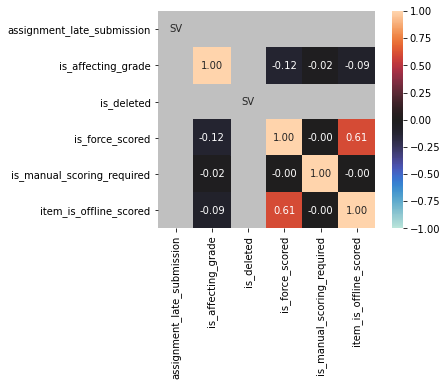

In [78]:
corr, ax = associations( dfRaw.select(*binaryVars).toPandas(), nan_replace_value='null' )

- No correlation

In [79]:
add_todo("Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted")

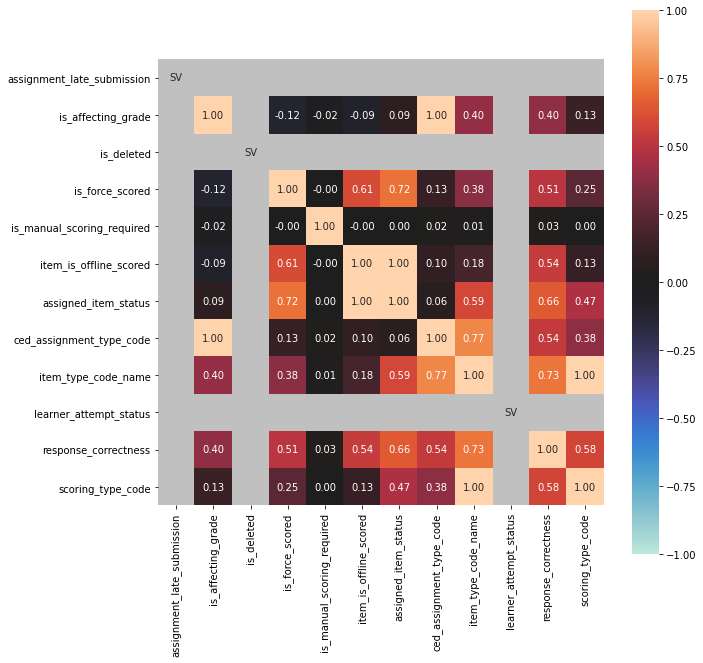

In [80]:
corr, ax = associations( dfRaw.select(*binaryVars, *nominalVars).toPandas(), nan_replace_value='null', figsize=[10,10] )

- New correlations
  - is_affecting_grade and ced_assignment_type_code
  - item_is_offline_scored and assigned_item_status

In [82]:
def grade_to_code():
  dfPd = dfRaw.select('is_affecting_grade','ced_assignment_type_code').toPandas()
  return pd.crosstab(dfPd.is_affecting_grade.fillna('null'), dfPd.ced_assignment_type_code.fillna('null'), margins=True, margins_name="Total")
  
grade_to_code()

ced_assignment_type_code,assessment,clo,game,practice,rubric,Total
is_affecting_grade,,,,,,
False,0,0,0,2562,0,2562
True,76172,248,1555,0,11,77986
Total,76172,248,1555,2562,11,80548


- is_affecting_grade = false when ced_assignment_type_code = practice

In [83]:
def offline_to_status():
  dfPd = dfRaw.toPandas()
  return pd.crosstab(dfPd.item_is_offline_scored.fillna('null'), dfPd.assigned_item_status.fillna('null'), margins=True, margins_name="Total")
  
offline_to_status()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2999-01-01 00:00:00

- item_is_offline_scored = True is always assigned_item_status = offline_scored

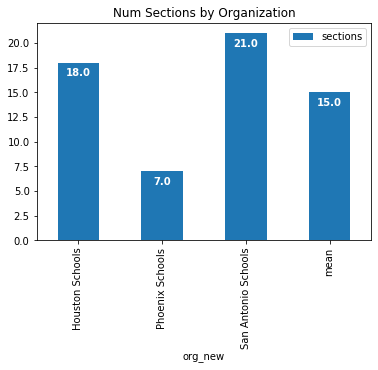

In [89]:
def sections_by_org():
  sByO = dfRaw.groupBy('org_new').agg(F.countDistinct('section_id').alias('sections')).orderBy('org_new')
  pdDf = sByO.toPandas()

  # Add mean
  meanSections = sByO.agg(F.round(F.avg(F.col('sections'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'sections': meanSections}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','sections', title='Num Sections by Organization')
  annotate_plot(ax)
  plt.show()
  
sections_by_org()

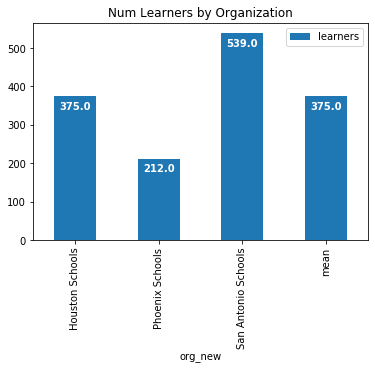

In [90]:
def learners_by_org():
  lByO = dfRaw.groupBy('org_new').agg(F.countDistinct('learner_id').alias('learners')).orderBy('org_new')
  pdDf = lByO.toPandas()

  # Add mean
  meanlearners = lByO.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','learners', title='Num Learners by Organization')
  annotate_plot(ax)
  plt.show()
  
learners_by_org()

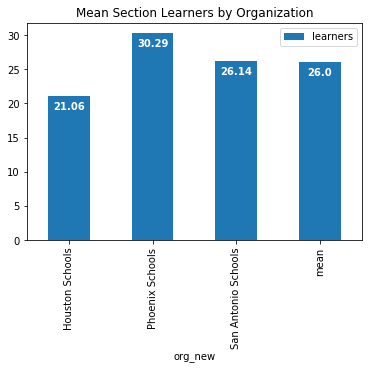

In [91]:
def sec_learners_by_org():
  lByS = dfRaw.groupBy('org_new','section_id').agg(F.countDistinct('learner_id').alias('learners'))
  # Av
  lBySMean = lByS.groupBy('org_new').agg( F.avg('learners').alias('learners') ).orderBy('org_new')
  pdDf = lBySMean.toPandas()

  # Add mean
  meanlearners = lBySMean.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','learners', title='Mean Section Learners by Organization')
  annotate_plot(ax)
  plt.show()
  
sec_learners_by_org()

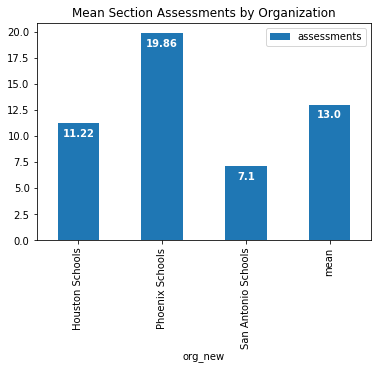

In [92]:
def sec_assess_by_org():
  assessBySection = dfRaw.groupBy('org_new','section_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_new').agg( F.avg('assessments').alias('assessments') ).orderBy('org_new')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'assessments': meanAssess}, ignore_index=True)


  ax = pdDf.plot.bar('org_new','assessments', title='Mean Section Assessments by Organization')
  annotate_plot(ax)
  plt.show()
  
sec_assess_by_org()

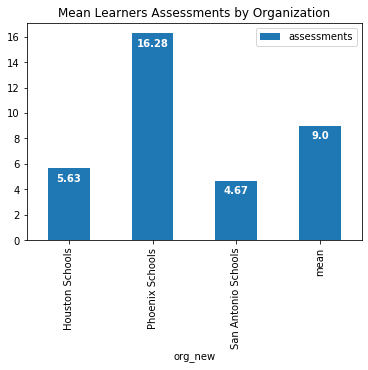

In [93]:
def assess_by_org():
  assessBySection = dfRaw.groupBy('org_new','learner_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_new').agg( F.avg('assessments').alias('assessments') ).orderBy('org_new')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'assessments': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','assessments', title='Mean Learners Assessments by Organization')
  annotate_plot(ax)
  plt.show()
  
assess_by_org()

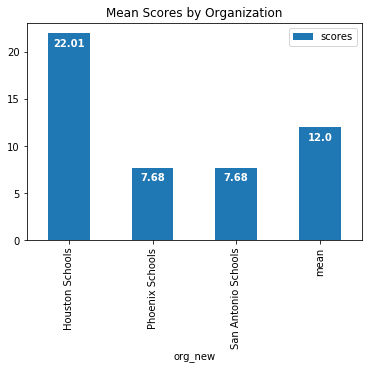

In [94]:
# scores by orgs
def scores_by_orgs():
  sByO = dfRaw.groupBy('org_new').agg( F.avg('final_score_unweighted').alias('scores') ).orderBy('org_new')

  pdDf = sByO.toPandas()

  # Add mean
  meanAssess = sByO.agg(F.round(F.avg(F.col('scores'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'scores': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','scores', title='Mean Scores by Organization')
  annotate_plot(ax)
  plt.show()
  
scores_by_orgs()

yes
